In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
file = r'C:\Users\Gouth_000\NYC_Jobs.csv'
df = pd.read_csv(file)

In [16]:
df.tail(20)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
3445,352431,OFFICE OF MANAGEMENT & BUDGET,Internal,1,ANALYST,MISCELLANEOUS BUDGET,6088,1,"Finance, Accounting, & Procurement Policy, Res...",F,...,"REQUIREMENTS: Assistant Analyst ($43,618+): B...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-12T00:00:00,NaN,2018-07-12T00:00:00,2018-07-31T00:00:00
3446,352431,OFFICE OF MANAGEMENT & BUDGET,External,1,ANALYST,MISCELLANEOUS BUDGET,6088,1,"Finance, Accounting, & Procurement Policy, Res...",F,...,"REQUIREMENTS: Assistant Analyst ($43,618+): B...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-12T00:00:00,NaN,2018-07-12T00:00:00,2018-07-31T00:00:00
3447,352436,OFFICE OF MANAGEMENT & BUDGET,Internal,1,ANALYST,ECONOMIC DEVELOPMENT,6088,1,"Finance, Accounting, & Procurement Policy, Res...",F,...,"REQUIREMENTS: Assistant Analyst ($43,618+): B...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-12T00:00:00,NaN,2018-07-12T00:00:00,2018-07-31T00:00:00
3448,352436,OFFICE OF MANAGEMENT & BUDGET,External,1,ANALYST,ECONOMIC DEVELOPMENT,6088,1,"Finance, Accounting, & Procurement Policy, Res...",F,...,"REQUIREMENTS: Assistant Analyst ($43,618+): B...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-12T00:00:00,NaN,2018-07-12T00:00:00,2018-07-31T00:00:00
3449,352439,OFFICE OF MANAGEMENT & BUDGET,Internal,1,UNIT HEAD,ADMINISTRATIVE SERVICES,6088,2,"Administration & Human Resources Finance, Acco...",F,...,"REQUIREMENTS: Unit Head ($91,588): Bachelor's...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-12T00:00:00,NaN,2018-07-12T00:00:00,2018-07-31T00:00:00
3450,352439,OFFICE OF MANAGEMENT & BUDGET,External,1,UNIT HEAD,ADMINISTRATIVE SERVICES,6088,2,"Administration & Human Resources Finance, Acco...",F,...,"REQUIREMENTS: Unit Head ($91,588): Bachelor's...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-12T00:00:00,NaN,2018-07-12T00:00:00,2018-07-31T00:00:00
3451,352446,OFFICE OF MANAGEMENT & BUDGET,Internal,2,ANALYST,TRANSPORTATION,6088,1,"Finance, Accounting, & Procurement Policy, Res...",F,...,"REQUIREMENTS: Assistant Analyst ($43,618+): B...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-12T00:00:00,NaN,2018-07-18T00:00:00,2018-07-31T00:00:00
3452,352446,OFFICE OF MANAGEMENT & BUDGET,External,2,ANALYST,TRANSPORTATION,6088,1,"Finance, Accounting, & Procurement Policy, Res...",F,...,"REQUIREMENTS: Assistant Analyst ($43,618+): B...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-12T00:00:00,NaN,2018-07-18T00:00:00,2018-07-31T00:00:00
3453,352454,OFFICE OF MANAGEMENT & BUDGET,Internal,1,ASSISTANT DIRECTOR,ADMINISTRATION OF JUSTICE,0608A,M4,"Finance, Accounting, & Procurement Policy, Res...",F,...,"REQUIREMENTS: Assistant Director ($131,969) B...","For City employees, please go to Employee Self...",,255 Greenwich Street,NaN,New York City residency is generally required ...,2018-07-13T00:00:00,NaN,2018-07-13T00:00:00,2018-07-31T00:00:00
3454,352454,OFFICE OF MANAGEMENT & BUDGET,External,1,ASSISTANT DIRECTOR,ADMINISTRATION OF JUSTICE,0608A,M4,"Finance, Accounting, & Procurement Policy, Res...",F,...,"REQUIREM

In [4]:
df.shape

(3465, 28)

In [5]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [6]:
# Various departments 
pd.Series(df.Agency.unique())

0       DEPARTMENT OF BUSINESS SERV.
1     DEPT OF ENVIRONMENT PROTECTION
2       NYC EMPLOYEES RETIREMENT SYS
3                     LAW DEPARTMENT
4              NYC HOUSING AUTHORITY
5      DEPT OF HEALTH/MENTAL HYGIENE
6       DEPT OF INFO TECH & TELECOMM
7     OFFICE OF COLLECTIVE BARGAININ
8          ADMIN FOR CHILDREN'S SVCS
9       DEPARTMENT OF TRANSPORTATION
10       DEPARTMENT OF INVESTIGATION
11                 POLICE DEPARTMENT
12       HRA/DEPT OF SOCIAL SERVICES
13     DEPT OF DESIGN & CONSTRUCTION
14                   FIRE DEPARTMENT
15    DISTRICT ATTORNEY RICHMOND COU
16             DEPARTMENT OF FINANCE
17         OFFICE OF THE COMPTROLLER
18        DEPT OF PARKS & RECREATION
19       LANDMARKS PRESERVATION COMM
20      CIVILIAN COMPLAINT REVIEW BD
21       DEPARTMENT OF CITY PLANNING
22          DEPARTMENT OF CORRECTION
23                    TAX COMMISSION
24           DEPARTMENT OF PROBATION
25       TAXI & LIMOUSINE COMMISSION
26           HUMAN RIGHTS COMMISSION
2

In [7]:
# Let's study the number of jobs in each department 
# We'll need to group by department and then aggregate the count 
df_jobs_group = df.groupby('Agency')['# Of Positions'].agg('sum')

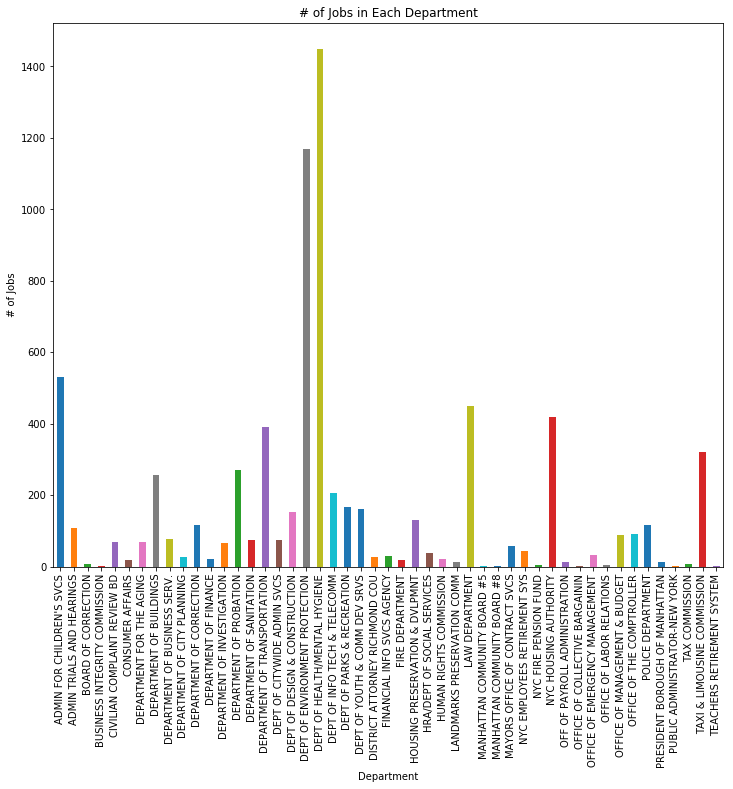

In [8]:
plt.figure(figsize=(12,10))
df_jobs_group.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('# of Jobs')
plt.title('# of Jobs in Each Department')
plt.show()

It looks like department of health and mental hygiene needs a lot of jobs. Why is that? Let's study the type of roles that are offered. Let's sort that list and see the descending order. Then I am going to look for key words that keep recurring in their job title and get the term frequency of each. 

In [9]:
df_jobs_group.sort_values(ascending=False)

Agency
DEPT OF HEALTH/MENTAL HYGIENE     1449
DEPT OF ENVIRONMENT PROTECTION    1170
ADMIN FOR CHILDREN'S SVCS          531
LAW DEPARTMENT                     449
NYC HOUSING AUTHORITY              418
DEPARTMENT OF TRANSPORTATION       390
TAXI & LIMOUSINE COMMISSION        322
DEPARTMENT OF PROBATION            270
DEPARTMENT OF BUILDINGS            257
DEPT OF INFO TECH & TELECOMM       207
DEPT OF PARKS & RECREATION         166
DEPT OF YOUTH & COMM DEV SRVS      160
DEPT OF DESIGN & CONSTRUCTION      152
HOUSING PRESERVATION & DVLPMNT     131
POLICE DEPARTMENT                  117
DEPARTMENT OF CORRECTION           116
ADMIN TRIALS AND HEARINGS          107
OFFICE OF THE COMPTROLLER           91
OFFICE OF MANAGEMENT & BUDGET       88
DEPARTMENT OF BUSINESS SERV.        78
DEPARTMENT OF SANITATION            74
DEPT OF CITYWIDE ADMIN SVCS         74
DEPARTMENT FOR THE AGING            70
CIVILIAN COMPLAINT REVIEW BD        68
DEPARTMENT OF INVESTIGATION         67
MAYORS OFFICE OF C

In [10]:
# Let's first study the jobs in the health department
df_health = df[df.Agency == 'DEPT OF HEALTH/MENTAL HYGIENE'][['Business Title','# Of Positions']]

In [11]:
df_health.count()

Business Title    802
# Of Positions    802
dtype: int64

In [12]:
# Let's study the number of jobs needed by each bureau in department of health and hygiene 
# We will need the text by the comma  
words=df_health['Business Title'].apply(lambda x:re.split(',|/',x))  

In [13]:
all_bureaus = [items for row in words for items in row if 'Bureau' in items] 

In [14]:
Counter(all_bureaus).most_common(10)

[(' Bureau of School Health', 101),
 (' Bureau of Tuberculosis Control', 34),
 (' Bureau of Maternal Infant and Reproductive Health', 28),
 (' Bureau of Mental Health', 26),
 (' Bureau of HIV', 22),
 (' Bureau of Early Intervention', 20),
 (' Bureau of Childcare', 16),
 (' Bureau of Public Health Laboratory', 16),
 (' Bureau of Veterinary and Pest Control Services', 14),
 (' Bureau of Food Safety and Community Sanitation', 14)]

Wow, it looks like school health needs the most help with 101 jobs that are vacant. Now what else am I curious about?

1. Is there a reason why there is a lot of jobs needed in bureau of school health? Do we not have enough skilled labourers? 
2. Can we study the various engineering jobs in the city? 

In [22]:
# Studying the job category in Bureau of School Health  
job_category = [row[0] for row in words for items in row if 'Bureau of School Health' in items]

In [26]:
# let's tally up all the unique fields 
pd.Series(job_category).value_counts() 

Public Health Adviser                         20
School Mental Health Consultant                8
Field Doctor                                   6
Supervising Health Nurse                       6
School Culture and Environment Coordinator     4
Supervising Physician                          4
School Mental Health Research Analyst          2
ACMP Deputy Director                           2
CATCH Field Medical Doctor                     2
SMH Director of Planning                       2
Public Health Adviser Central Office           2
School Health Nurse Practitioner               2
Program Distribution Specialist                2
BND Administrative Assistant                   2
CATCH  Public Health Adviser                   2
School Mental Health Training Coordinator      2
Regional (Field) Administrative Assistant      2
Supervisor of Data Entry Unit                  2
Public Health Nurse                            2
Screening Team Leader                          2
CATCH School Nurse  

Looks like we need a lot of public health advisers to advise on proper health 

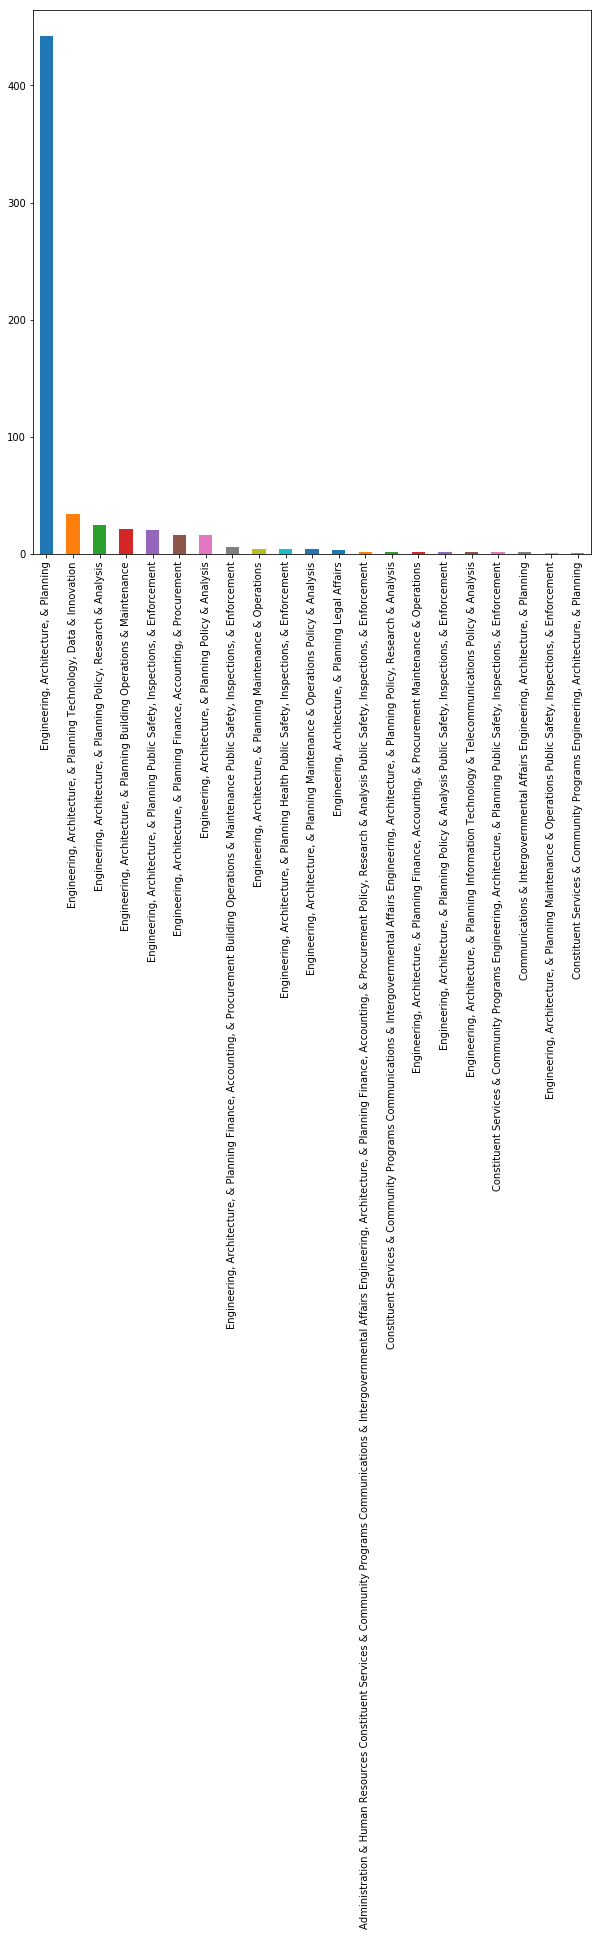

In [35]:
# Now let's study the engineering jobs in the new york city
plt.figure(figsize=(10,10))
df[df['Job Category'].str.contains('Engineering')]['Job Category'].value_counts().plot(kind='bar')
plt.show()

DANG, there is a huge demand for Engineering, Architecture and Planning jobs in NYC. I should probably focus on that for job search. 